abrimos el json


In [23]:
# Con estas 2 lineas recargamos automaticamente todos los archivos afiliados al proyecto, sin necesidad de usar el boton de Restart
%load_ext autoreload
%autoreload 2

from modules.open_json import open_json
import folium
 
mypime = list(open_json("../json/mypime.json"))
geojson = open_json("../json/lha.geojson")
canasta_basica = open_json("../json/canasta_basica.json")
revolico = open_json("../json/revolico.json ")
yerro_m = open_json("./modules/scraping/json_yerro_m/yerro_m.json")


provincia_map = folium.Map(location=(23.133865,-82.3585654))

for i in range(len(mypime)):
    if mypime[i]["ubicacion"]["lat"] is not None and mypime[i]["ubicacion"]["long"] is not None:
        
        folium.Marker(
            location=[mypime[i]["ubicacion"]["lat"], mypime[i]["ubicacion"]["long"]],
            tooltip=f"{mypime[i]["nombre"]}",
            popup= f"<h3>Municipio: {mypime[i]["municipio"]}✅  Horario: {mypime[i]["horario"]} ⏰</h3>",
            icon=folium.Icon(icon="shopping-cart", color="blue")
        ).add_to(provincia_map)

for j in range(len(yerro_m)):
    if yerro_m[j]["ubicacion"]["lat"] is not None and yerro_m[j]["ubicacion"]["long"] is not None:
             
        folium.Marker(
            location=[yerro_m[j]["ubicacion"]["lat"], yerro_m[j]["ubicacion"]["long"]],
            tooltip=f"{yerro_m[j]["nombre"]}",
            popup= f"<h3>Municipio: {yerro_m[j]["municipio"]}✅  Horario: {yerro_m[j]["horario"]} ⏰</h3>",
            icon=folium.Icon(icon="shopping-cart", color="red")
        ).add_to(provincia_map)
        
        
folium.GeoJson(geojson,
               style_function= lambda x: {
                   "fillColor": "#93FF69",
                   "color": "#08CB00"
               }
               ).add_to(provincia_map)
folium
    
provincia_map

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
r_productos = revolico["productos"]
 
cb_productos = canasta_basica["productos"]


[{'nombre': 'Bodegón de Calzada', 'municipio': 'Plaza de la Revolución', 'ubicacion': {'lat': 23.137886472972525, 'long': -82.39905099268489}, 'horario': '', 'productos': [{'tipo': 'granos', 'nombre': 'Arroz Blanco', 'marca': 'Camil', 'presentacion': 'kg', 'nacional': False, 'precio_cup': 680}], 'metodo_pago': {'USD': False, 'CUP': True, 'MLC': False, 'Transaferencia': None}, 'tasa_cambio': {'USD': None, 'MLC': None, 'EUR': None}, 'redes_sociales': False}, {'nombre': 'Mi Mercadito, Llegando', 'municipio': 'Plaza de la Revolución', 'ubicacion': {'lat': 23.142513466690126, 'long': -82.39636878359543}, 'horario': '', 'productos': [{'tipo': 'granos', 'nombre': 'Arroz Super Extra', 'marca': 'San Diego', 'presentacion': 'kg', 'nacional': False, 'precio_cup': 580}], 'metodo_pago': {'USD': False, 'CUP': True, 'MLC': False, 'Transaferencia': None}, 'tasa_cambio': {'USD': None, 'MLC': None, 'EUR': None}, 'redes_sociales': False}, {'nombre': 'El Rey, SRL', 'municipio': 'Plaza de la Revolución', '

Que se comercializa mas ? las bebidas nacionales o las internacionales

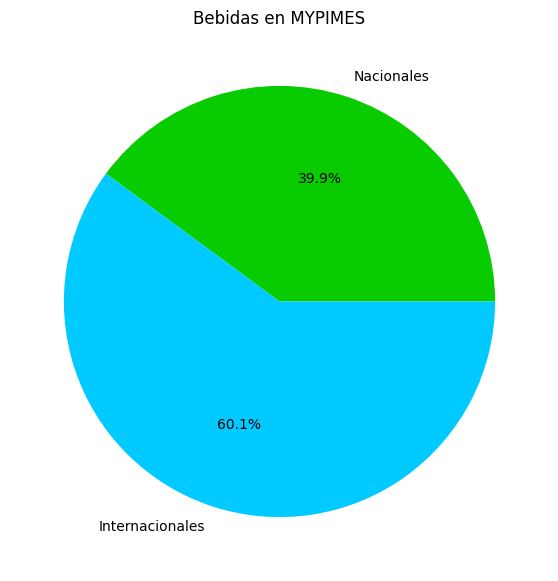

In [10]:
from modules.graphs import bebidas_porciento, yerro_bebida
bebidas_porciento(yerro_bebida(yerro_m))

marcas que mas se comercializan

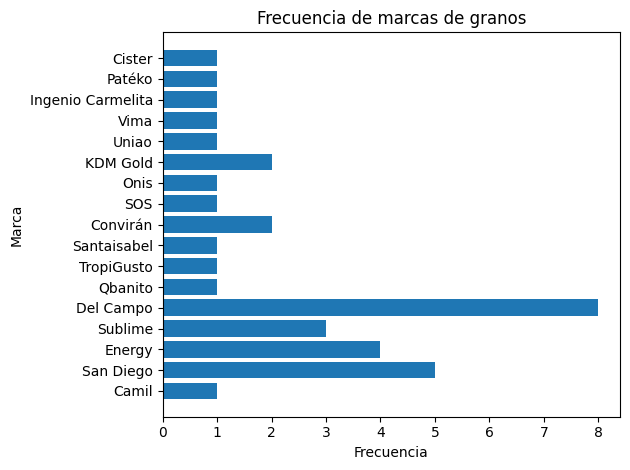

In [27]:
from modules.graphs import productos_mypimes, marcas
import matplotlib.pyplot as plt

a = productos_mypimes(mypime)
marcas(a)


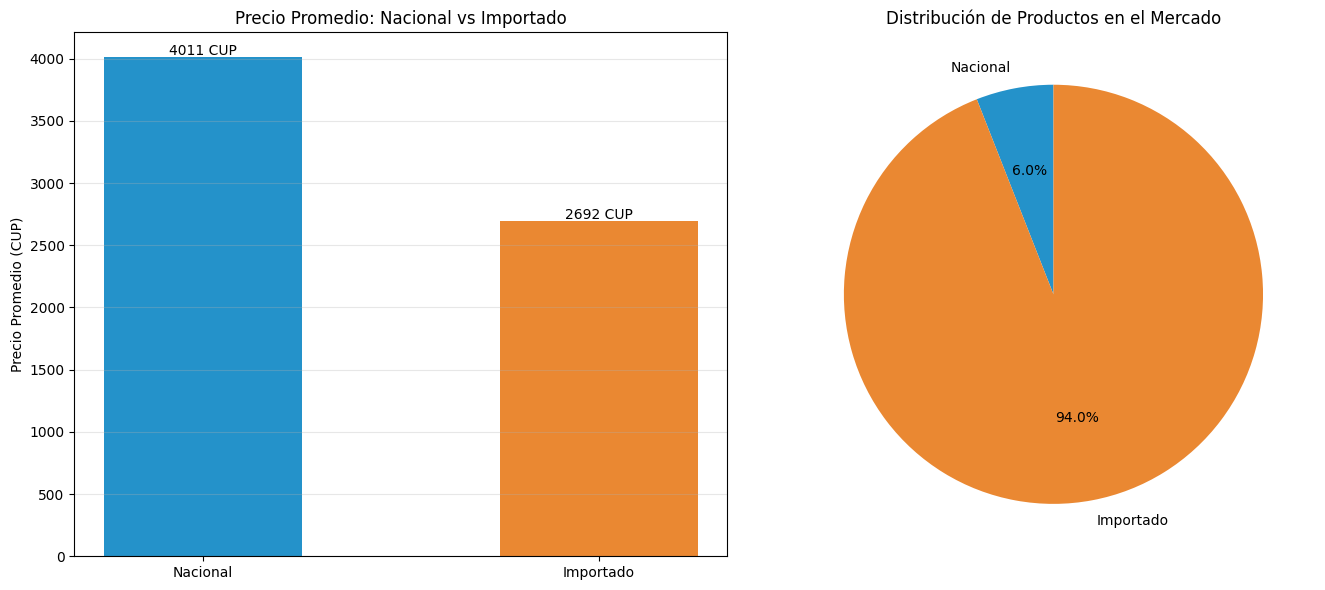

In [55]:
from modules.graphs import promedio, productos_mypimes
def analizar_nacional_vs_importado():
    
    productos = productos_mypimes(mypime)
    
    nacionales = []
    importados = []
    
    for tienda in productos:
            if "nacional" in tienda:
                if tienda["nacional"] == True:
                    nacionales.append(tienda["precio_cup"])
                else:
                    importados.append(tienda["precio_cup"])
    
    promedio_nacional = promedio(nacionales)
    promedio_importado = promedio(importados)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # barras
    categorias = ["Nacional", "Importado"]
    promedios = [promedio_nacional, promedio_importado]
    colores_barras = ["#2492CA", "#ea8832"]
    
    ax1.bar(categorias, promedios, color=colores_barras, width=0.5)
    ax1.set_ylabel("Precio Promedio (CUP)")
    ax1.set_title("Precio Promedio: Nacional vs Importado")
    ax1.grid(axis="y", alpha=0.3)
    
    for i, v in enumerate(promedios):
        ax1.text(i, v + 20, f"{v:.0f} CUP", ha="center")
    
    # pastel
    cantidades = [len(nacionales), len(importados)]
    ax2.pie(cantidades, labels=categorias, autopct="%1.1f%%", colors=colores_barras, startangle=90)
    ax2.set_title("Distribución de Productos en el Mercado")
    
    plt.tight_layout()
    plt.show()

analizar_nacional_vs_importado()

Canasta Básica Mínima: ¿Cuánto cuesta sobrevivir un mes? 

In [39]:
def tabla_completa_analisis():
    salario_minimo = 2100
    salario_medio = 6506.5
    
    todoscb = []
    todosm = []
    
    for cb in cb_productos:
        precios_cb = cb["precio_cup"]
        todoscb.append(precios_cb)
    suma_cb = sum(todoscb)
    
    for m in m_productos:
        precios_m = m["precio_cup"]
        todosm.append(precios_m)
    suma_m = sum(todosm)
    
    porcentaje_cb_minimo = (suma_cb / salario_minimo) * 100
    porcentaje_cb_medio = (suma_cb / salario_medio) * 100
    porcentaje_m_minimo = (suma_m / salario_minimo) * 100
    porcentaje_m_medio = (suma_m / salario_medio) * 100
    
    balance_cb_minimo = salario_minimo - suma_cb
    balance_cb_medio = salario_medio - suma_cb
    balance_m_minimo = salario_minimo - suma_m
    balance_m_medio = salario_medio - suma_m
    
    
    salarios_nec_cb_minimo = suma_cb / salario_minimo
    salarios_nec_cb_medio = suma_cb / salario_medio
    salarios_nec_m_minimo = suma_m / salario_minimo
    salarios_nec_m_medio = suma_m / salario_medio
    
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.axis("tight")
    ax.axis("off")
    
    datos_tabla = [
        ["CONCEPTO", "SALARIO MÍNIMO", "SALARIO MEDIO"],
        ["", "", ""],
        ["INGRESOS", "", ""],
        ["Salario Mensual (CUP)", f"{salario_minimo:,.2f}", f"{salario_medio:,.2f}"],
        ["", "", ""],
        ["CANASTA BÁSICA OFICIAL", "", ""],
        ["Costo Total (CUP)", f"{suma_cb:,.2f}", f"{suma_cb:,.2f}"],
        ["% del Salario", f"{porcentaje_cb_minimo:.2f}%", f"{porcentaje_cb_medio:.2f}%"],
        ["Balance", f"{balance_cb_minimo:,.2f}", f"{balance_cb_medio:,.2f}"],
        ["", "", ""],
        [" MERCADO REAL (MYPIMES)", "", ""],
        ["Costo Total (CUP)", f"{suma_m:,.2f}", f"{suma_m:,.2f}"],
        ["% del Salario", f"{porcentaje_m_minimo:.2f}%", f"{porcentaje_m_medio:.2f}%"],
        ["Balance", f"{balance_m_minimo:,.2f}", f"{balance_m_medio:,.2f}"],
        ["", "", ""],
        [" ANÁLISIS", "", ""],
        ["Salarios Necesarios (Oficial)", f"{salarios_nec_cb_minimo:.2f}", f"{salarios_nec_cb_medio:.2f}"],
        ["Salarios Necesarios (Mypimes)", f"{salarios_nec_m_minimo:.2f}", f"{salarios_nec_m_medio:.2f}"]
    ]
    
    colores_filas = []
    for i, fila in enumerate(datos_tabla):
        if i == 0:
            colores_filas.append(["#047204", "#047204", "#047204"])  
        elif i in [2, 5, 10, 15]:
            colores_filas.append(["#3498db", "#3498db", "#3498db"])  
        elif fila[0] == "Balance" or fila[0].startswith("Salarios Necesarios"):
            colores_filas.append(["#ffcccc", "#ffcccc", "#ffcccc"]) 
        elif i in [3, 6, 7, 11, 12, 16, 17]:
            colores_filas.append(["#f0f0f0", "#f0f0f0", "#f0f0f0"]) 
        else:
            colores_filas.append(["white", "white", "white"])  
    
    tabla = ax.table(cellText=datos_tabla, cellLoc="center", loc="center",
                     cellColours=colores_filas)
    
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(11)
    tabla.scale(1, 2.5)
    
    for i in range(3):
        celda = tabla[(0, i)]
        celda.set_text_props(weight="bold", color="white", size=12)
    
    for idx in [2, 5, 10, 15]:
        for i in range(3):
            celda = tabla[(idx, i)]
            celda.set_text_props(weight="bold", color="white", size=11)
    
    plt.title("ANÁLISIS COMPLETO: PODER ADQUISITIVO", 
              fontsize=16, fontweight="bold", pad=20)
    plt.tight_layout()
    plt.show()
    
tabla_completa_analisis()

NameError: name 'm_productos' is not defined

In [11]:
from modules.graphs import pmm
def precios():
    
    tipos_precios = {}
    
    for tienda in m_productos:
        tipo = tienda["tipo"]
        precio = tienda["precio_cup"]


        if tipo not in tipos_precios:
            tipos_precios[tipo] = []
        tipos_precios[tipo].append(precio)
        
    
    tipos = list(tipos_precios.keys())
    promedios = []
    maximos = []
    minimos = []
    
    for tipo in tipos:
        precios = tipos_precios[tipo]
        promedios.append(sum(precios) / len(precios))
        maximos.append(max(precios))
        minimos.append(min(precios))
    
    pmm(tipos, promedios, maximos, minimos)

precios()

NameError: name 'm_productos' is not defined

In [ ]:
from modules.scraping.eltoque import eltoque_scraper

tasas_cambio = eltoque_scraper()


EUR: 485.0, USD: 440.0, MLC: 295.0


In [72]:
from modules.graphs import union

todo = union(mypime, yerro_m)

def presentacion(todo):
    prodct_lb = []
    prodct_kg = []
    prodct_g = []
    
    for tienda in todo:  
        productos = tienda.get("productos")
        
        for producto in productos:
            presentacion_val = producto.get("presentacion")
            precio = producto.get("precio_cup")
            
            if precio is not None:  
                if presentacion_val == "lb":
                    prodct_lb.append(precio)
                elif presentacion_val == "kg":
                    prodct_kg.append(precio)
                elif presentacion_val == "g":  
                    prodct_g.append(precio)
   
    return prodct_lb, prodct_kg, prodct_g

resultados = presentacion(todo)


inflacion


In [ ]:
from modules.graphs import calcular_inflacion_real
calcular_inflacion_real(productos_canasta = cb_productos, productos_mypimes = m_productos)

UnboundLocalError: cannot access local variable 'precio_frijol_oficial' where it is not associated with a value


Poder Adquisitivo: ¿Cuántas horas de trabajo se necesitan?